# Pyber Rideshare Analysis
1. Rural areas contain the smallest share of total fares, rides, and drivers. However, they fare and away charge the most as seen in the bubble plot. The average fare is much higher in rural areas compared to suburban or urban areas. This could be explained due to simple supply and demand, as the supply of rides is smaller, which drives the price up. 
2. Urban makes up a majority of total fares, rides, and especially drivers. While Urban areas contain about 60% - 70% of total fares and rides, they contain a 87% of total drivers. This can be possibly be explained by the fact that the drives are shorter in Urban areas, making the total fares smaller, but with much more people, making the amount of drivers needed much higher.
3. In general, there is a decreasing trend in average fare as number of rides increases. This is a pattern among the city types as well. Rural starts with a lower amount of rides but a higher average fare. But it's the reverse as we move into Urban. Average travel distance may be a reason, as well as more of a supply of drivers which lowers the fare.

In [169]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
merged_df = pd.merge(city_data_df, ride_data_df, on = 'city')

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [170]:
#Group By City
city_group = merged_df.groupby('city')

#Average Fare Per City
avg_fare = city_group['fare'].mean()

#Total Rides Per City
tot_rides = city_group['ride_id'].count()

#Total Drivers Per City
tot_drivers = city_group['driver_count'].mean()

#City Type Data
city_type = city_data_df.set_index('city')['type']


#Create New DataFrame
city_info = pd.DataFrame({'Number Of Rides':tot_rides,'Average Fare': avg_fare,
                          'Total Drivers': tot_drivers, 'City Type': city_type})

city_info.head()

,Number Of Rides,Average Fare,Total Drivers,City Type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


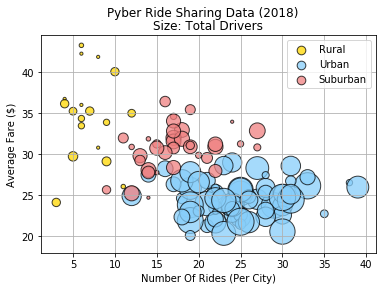

In [171]:
#Separate into separate dataframes
rural = city_info.loc[city_info['City Type'] == 'Rural', :]
urban = city_info.loc[city_info['City Type'] == 'Urban', :]
suburban = city_info.loc[city_info['City Type'] == 'Suburban', :]

#Create Scatterplot for each city type
plt.scatter(rural['Number Of Rides'], rural['Average Fare'], s = rural['Total Drivers']*10, alpha = .75, 
            color = 'gold', edgecolor = 'black', label = 'Rural')
plt.scatter(urban['Number Of Rides'], urban['Average Fare'], s = urban['Total Drivers']*10, alpha = .75,
            color = '#87CEFA' , edgecolor = 'black', label = 'Urban')
plt.scatter(suburban['Number Of Rides'], suburban['Average Fare'], s= suburban['Total Drivers']*10, alpha = .75,
            color = '#F08080', edgecolor = 'black', label = 'Suburban')

#Add Axis and Title
plt.xlabel('Number Of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.suptitle('Pyber Ride Sharing Data (2018)')
plt.title('Size: Total Drivers')

#Other Plot Details
plt.grid()
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Show plot
plt.show()

## Total Fares by City Type

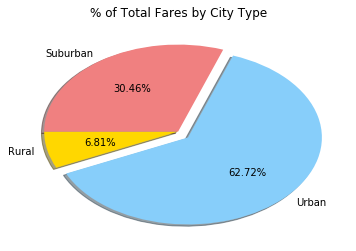

In [172]:
# Calculate Type Percents
#Create Grouping By City Type
type_gp = merged_df.groupby('type')

#Total all fares
fares_sum = type_gp['fare'].sum()


rural_sum = fares_sum['Rural']
urban_sum = fares_sum['Urban']
suburban_sum = fares_sum['Suburban']

labels = ['Rural', 'Urban', 'Suburban']
sums = [rural_sum, urban_sum, suburban_sum]
colors = ['gold', '#87CEFA','#F08080']
explode = (0, .1, 0)


# Build Pie Chart
plt.pie(sums, labels = labels, colors = colors, autopct = '%1.2f%%', shadow = True, startangle = 180, explode = explode)
plt.title('% of Total Fares by City Type')

#Save Figure
plt.savefig('Images/%Fares.png')

#Show Figure
plt.show()

## Total Rides by City Type

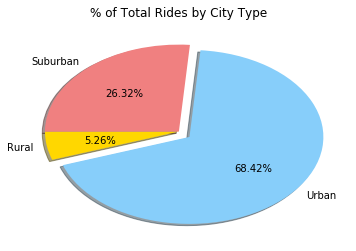

In [173]:
# Calculate Ride Percents
#Total All Rides
rides_count = type_gp['ride_id'].count()

rural_count = rides_count['Rural']
urban_count = rides_count['Urban']
suburban_count = rides_count['Suburban']

#Prepare For Chart
labels = ['Rural', 'Urban', 'Suburban']
counts = [rural_count, urban_count, suburban_count]
colors = ['gold', '#87CEFA','#F08080']
explode = (0, .1, 0)

# Build Pie Chart
plt.pie(counts, labels = labels, explode = explode, colors = colors, shadow = True, autopct = '%1.2f%%', startangle = 180 )
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Images/%Rides.png')

#Show Figure
plt.show()

## Total Drivers by City Type

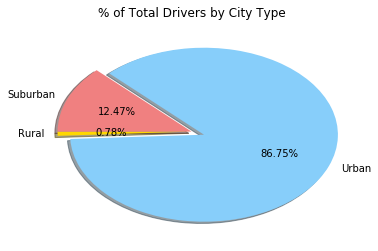

In [174]:
# Calculate Driver Percents
drivers_sum = type_gp['driver_count'].sum() 

rural_sum = drivers_sum['Rural'] 
urban_sum = drivers_sum['Urban']
suburban_sum = drivers_sum['Suburban']

#Prepare For Chart
labels = ['Rural', 'Urban', 'Suburban']
sums = [rural_sum, urban_sum, suburban_sum]
colors = ['gold', '#87CEFA','#F08080']
explode = (0, .1, 0)

# Build Pie Charts
plt.pie(sums, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.2f%%', startangle = 180)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('Images/%Drivers.png')

#Show Figure
plt.show()